In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from string import ascii_letters

In [2]:
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sn

def evaluate_model (model,x_test,y_test):
    y_predicted = model.predict(x_test)
    y_predicted = np.array([0 if prediction < 0.5 else 1 for prediction in y_predicted])
    cm = confusion_matrix(y_test, y_predicted)
    print(classification_report(y_test,y_predicted))
    tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
    
    #metrics
    print("True Negative: ",tn)
    print("False Positive: ",fp)
    print("False Negative: ",fn)
    print("True Negative: ",tp)
    
    tpr = tp/(tp+fn) #Recall
    tnr = tn/(tn+fp) #Specificity
    fnr = fn/(fn+tp)
    fpr = fp/(fp+tn)
    precision = tp/(tp+fp)
    
    print("True Positive Rate (Recall): ",tpr)
    print("True Negative Rate (Specificity): ",tnr)
    print("False Negative Rate: ",fnr)
    print("False Positive Rate: ",fpr)
    print("Precision: ",precision)
    
    #confusion matrix
    plt.figure(figsize=(12,6))
    sn.heatmap(cm, annot=True)
    plt.xlabel('Predicted', fontsize=24)
    plt.ylabel('Truth',fontsize=24)
    

Metrics = [
    keras.metrics.TruePositives(name = 'tp'),
    keras.metrics.FalsePositives(name = 'fp'),
    keras.metrics.TrueNegatives(name = 'tn'),
    keras.metrics.FalseNegatives(name = 'fn'),
    keras.metrics.BinaryAccuracy(name = "accuracy"),
    keras.metrics.Precision(name = 'precision'),
    keras.metrics.Recall(name = 'recall')
    
]

2023-05-20 08:31:40.574778: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-20 08:31:40.574799: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-20 08:31:42.230130: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-20 08:31:42.230158: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-20 08:31:42.230178: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (santiagoguiral-hp-p15): /proc/driver/nvidia/version does not exist
2023-05-20 08:31:42.230403: I tensorflow/core/platform/

In [13]:
def plot_loss(hist):
    
    epoch_count = range(1, len(hist.history['loss']) + 1)
    
    plt.figure(figsize=(12,6))
    plt.semilogy(epoch_count, hist.history['loss'], label="Train")
    plt.semilogy(epoch_count, hist.history['val_loss'], label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

In [14]:
df = pd.read_csv("cicids2017_balanced.csv")
df = df.sample(frac = 1)
df.head(8)

,Source Port,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1080305,57988,443,142,2,0,12.0,0.0,6.0,6.0,6.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
516184,38576,4045,49,1,1,0.0,6.0,0.0,0.0,0.000000,...,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1173370,57526,80,85037077,7,6,344.0,11595.0,338.0,0.0,49.142857,...,20,956.0,0.0,956.0,956.0,84900000.0,0.0,84900000.0,84900000.0,1
484401,39140,32771,76,1,1,0.0,6.0,0.0,0.0,0.000000,...,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
618334,50352,5555,50,1,1,0.0,6.0,0.0,0.0,0.000000,...,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
936652,35517,3659,70,2,2,4.0,12.0,2.0,2.0,2.000000,...,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
781571,52172,80,451820,3,4,26.0,11601.0,20.0,0.0,8.666667,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
465099,443,10437,3,2,0,12.0,0.0,6.0,6.0,6.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### Dataset partition

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from keras.utils.vis_utils import plot_model

In [5]:
df_copy = df.copy()

# Partición del dataset
df_train, df_test = train_test_split(df, test_size = 0.3, random_state=1)


y_train = np.array(df_train.pop(' Label'))
y_test = np.array(df_test.pop(' Label'))

train = np.array(df_train)
test = np.array(df_test)


print("Dataset partition:\n", "Train:", df_train.shape, "\n", "Test", df_test.shape)

Dataset partition:
 Train: (998748, 68) 
 Test (428036, 68)


### Normalize the dataset

In [6]:
# Escalar el dataset excepto las categorias
scaler = StandardScaler() # Normalización de los datos

x_train = scaler.fit_transform(train)
x_test = scaler.transform(test)

print("Dataset partition:\n", "Train:", x_train.shape, "\n", "Test", x_test.shape)

Dataset partition:
 Train: (998748, 68) 
 Test (428036, 68)


In [7]:
from keras.layers import Input, Embedding, Dense, Dropout
from keras.layers import SimpleRNN, GRU, LSTM
from keras.models import Model, Sequential

# Neural Network

In [8]:
input_shape = x_train.shape[1]
input_shape

68

In [9]:
def RNN_model(dim_input, x_train_shape):
    
    dropout = 0.2
    
    RNN_model = Sequential()
    RNN_model.add(SimpleRNN(dim_input, input_shape=[x_train_shape,1], activation="tanh"))
    RNN_model.add(Dropout(dropout))
    RNN_model.add(Dense(10, activation="tanh"))
    RNN_model.add(Dense(1, activation="sigmoid"))
    
    RNN_model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.BinaryCrossentropy())

    return RNN_model

In [10]:
Model1 = RNN_model(input_shape, x_train.shape[1])
Model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 68)                4760      
                                                                 
 dropout (Dropout)           (None, 68)                0         
                                                                 
 dense (Dense)               (None, 10)                690       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 5,461
Trainable params: 5,461
Non-trainable params: 0
_________________________________________________________________


In [11]:
model1_hist = Model1.fit(x_train, y_train, epochs=30, batch_size=1000, validation_split=0.1, verbose=1)

Epoch 1/30
899/899 [==============================] - 81s 89ms/step - loss: 0.1267 - val_loss: 0.0776
Epoch 2/30
899/899 [==============================] - 84s 93ms/step - loss: 0.0767 - val_loss: 0.0686
Epoch 3/30
899/899 [==============================] - 85s 95ms/step - loss: 0.0646 - val_loss: 0.0540
Epoch 4/30
899/899 [==============================] - 83s 93ms/step - loss: 0.0608 - val_loss: 0.0717
Epoch 5/30
899/899 [==============================] - 83s 92ms/step - loss: 0.0574 - val_loss: 0.0528
Epoch 6/30
899/899 [==============================] - 88s 97ms/step - loss: 0.0556 - val_loss: 0.0518
Epoch 7/30
899/899 [==============================] - 80s 89ms/step - loss: 0.0549 - val_loss: 0.0505
Epoch 8/30
899/899 [==============================] - 83s 92ms/step - loss: 0.0538 - val_loss: 0.0460
Epoch 9/30
899/899 [==============================] - 83s 92ms/step - loss: 0.0514 - val_loss: 0.0446
Epoch 10/30
899/899 [==============================] - 82s 92ms/step - loss: 0.050

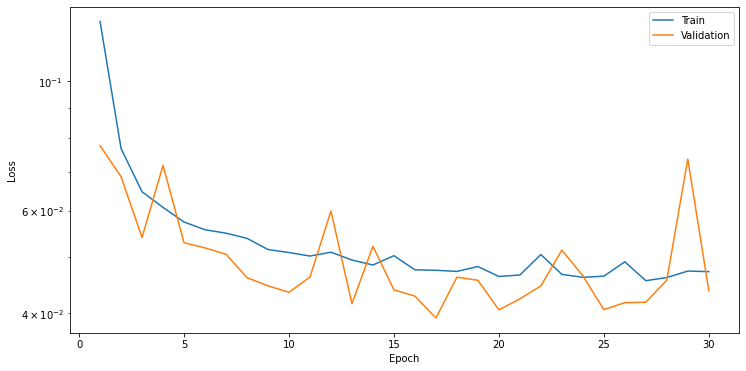

In [12]:
plot_loss(model1_hist)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    213920
           1       0.97      0.99      0.98    214116

    accuracy                           0.98    428036
   macro avg       0.98      0.98      0.98    428036
weighted avg       0.98      0.98      0.98    428036

True Negative:  208209
False Positive:  5711
False Negative:  1376
True Negative:  212740
True Positive Rate (Recall):  0.9935735769396028
True Negative Rate (Specificity):  0.9733031039640987
False Negative Rate:  0.006426423060397168
False Positive Rate:  0.026696896035901273
Precision:  0.9738568374601169


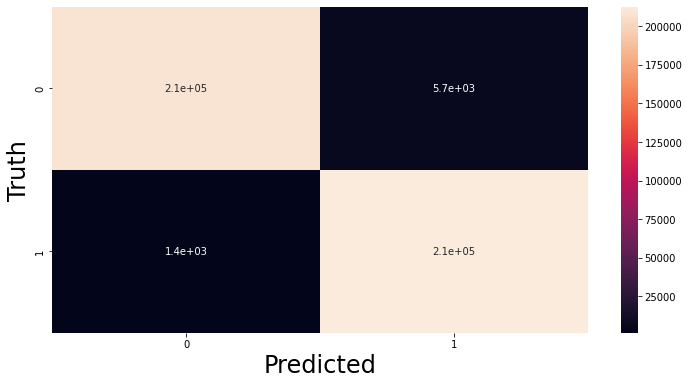

In [13]:
evaluate_model(Model1, x_test, y_test)

In [14]:
Model1.save('saved_models/RNNModel1.h5')

In [27]:
Model2 = RNN_model(input_shape, x_train.shape[1])
Model2.summary()

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='loss', 
                                                        patience=1, 
                                                        verbose=1,
                                                        mode='max',
                                                        restore_best_weights=False)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 68)                4760      
                                                                 
 dropout_4 (Dropout)         (None, 68)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                690       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 5,461
Trainable params: 5,461
Non-trainable params: 0
_________________________________________________________________


In [28]:
model2_hist = Model2.fit(x_train, y_train, epochs=20, batch_size=1000, validation_split=0.1, verbose=1, callbacks=[earlystopping])

Epoch 1/20
899/899 [==============================] - 69s 76ms/step - loss: 0.1320 - val_loss: 0.0785
Epoch 2/20
899/899 [==============================] - 77s 85ms/step - loss: 0.0734 - val_loss: 0.0605
Epoch 2: early stopping


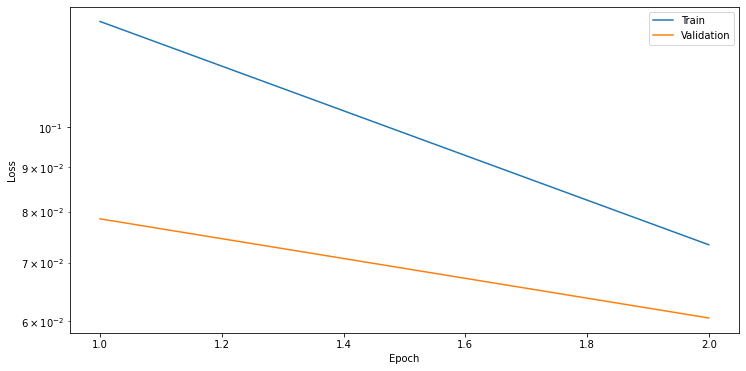

In [29]:
plot_loss(model2_hist)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    213920
           1       0.97      0.99      0.98    214116

    accuracy                           0.98    428036
   macro avg       0.98      0.98      0.98    428036
weighted avg       0.98      0.98      0.98    428036

True Negative:  207782
False Positive:  6138
False Negative:  2951
True Negative:  211165
True Positive Rate (Recall):  0.9862177511255581
True Negative Rate (Specificity):  0.9713070306656694
False Negative Rate:  0.01378224887444189
False Positive Rate:  0.02869296933433059
Precision:  0.9717537263636489


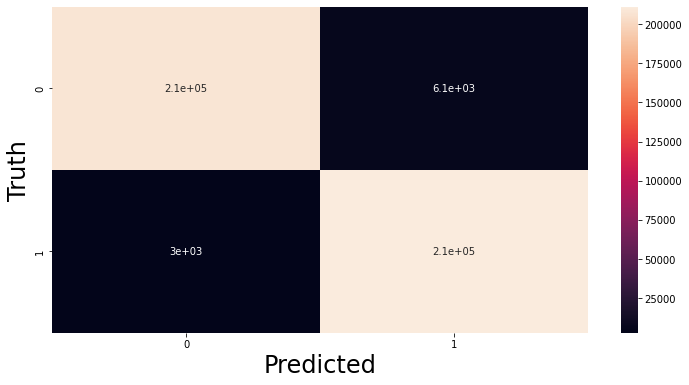

In [30]:
evaluate_model(Model2, x_test, y_test)

In [31]:
def GRU_model(dim_input, x_train_shape):
    
    dropout = 0.2
    
    GRU_model = Sequential()
    GRU_model.add(GRU(dim_input, input_shape=[x_train_shape,1], activation="tanh"))
    GRU_model.add(Dropout(dropout))
    GRU_model.add(Dense(10, activation="tanh"))
    GRU_model.add(Dense(1, activation="sigmoid"))
    
    GRU_model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.BinaryCrossentropy())

    return GRU_model

In [32]:
Model3 = GRU_model(input_shape, x_train.shape[1])
Model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 68)                14484     
                                                                 
 dropout_5 (Dropout)         (None, 68)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                690       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 15,185
Trainable params: 15,185
Non-trainable params: 0
_________________________________________________________________


In [33]:
model3_hist = Model3.fit(x_train, y_train, epochs=50, batch_size=1000, validation_split=0.1, verbose=1)

Epoch 1/50
899/899 [==============================] - 240s 263ms/step - loss: 0.2558 - val_loss: 0.1276
Epoch 2/50
899/899 [==============================] - 261s 291ms/step - loss: 0.1078 - val_loss: 0.0908
Epoch 3/50
899/899 [==============================] - 334s 371ms/step - loss: 0.0853 - val_loss: 0.0760
Epoch 4/50
899/899 [==============================] - 337s 375ms/step - loss: 0.0748 - val_loss: 0.0688
Epoch 5/50
899/899 [==============================] - 331s 368ms/step - loss: 0.0678 - val_loss: 0.0605
Epoch 6/50
899/899 [==============================] - 295s 329ms/step - loss: 0.0640 - val_loss: 0.0605
Epoch 7/50
899/899 [==============================] - 296s 329ms/step - loss: 0.0615 - val_loss: 0.0600
Epoch 8/50
899/899 [==============================] - 330s 367ms/step - loss: 0.0600 - val_loss: 0.0547
Epoch 9/50
899/899 [==============================] - 264s 294ms/step - loss: 0.0572 - val_loss: 0.0540
Epoch 10/50
899/899 [==============================] - 241s 268m

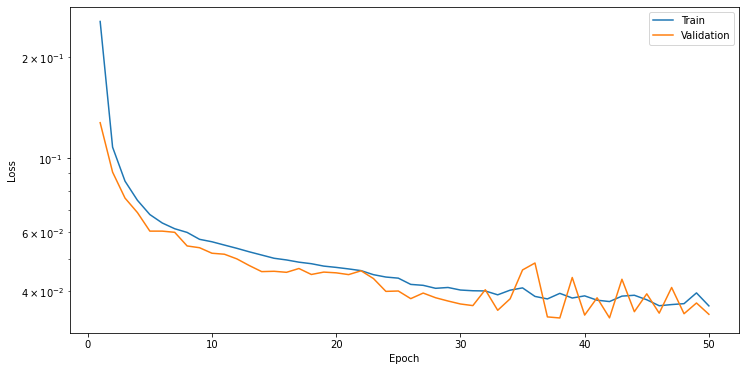

In [34]:
plot_loss(model3_hist)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    213920
           1       0.98      1.00      0.99    214116

    accuracy                           0.99    428036
   macro avg       0.99      0.99      0.99    428036
weighted avg       0.99      0.99      0.99    428036

True Negative:  209400
False Positive:  4520
False Negative:  628
True Negative:  213488
True Positive Rate (Recall):  0.9970670104055745
True Negative Rate (Specificity):  0.9788706058339566
False Negative Rate:  0.0029329895944254516
False Positive Rate:  0.02112939416604338
Precision:  0.9792668158966643


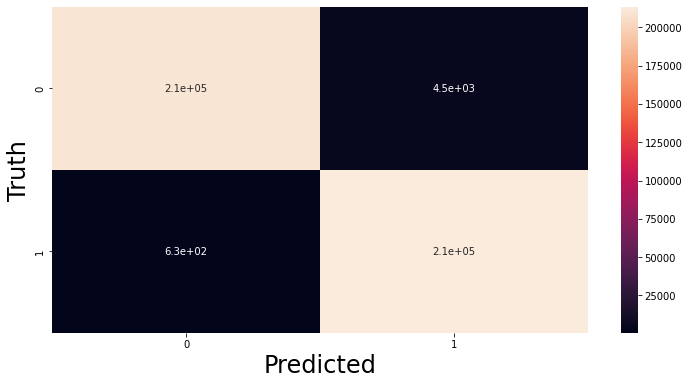

In [36]:
evaluate_model(Model3, x_test, y_test)

In [35]:
Model3.save('saved_models/GRUModel1.h5')

### LSTM

In [9]:
def LSTM_model(dim_input, x_train_shape):
    
    dropout = 0.2
    
    LSTM_model = Sequential()
    LSTM_model.add(LSTM(dim_input, input_shape=[x_train_shape,1], activation="tanh"))
    LSTM_model.add(Dropout(dropout))
    LSTM_model.add(Dense(10, activation="tanh"))
    LSTM_model.add(Dense(1, activation="sigmoid"))
    
    LSTM_model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.BinaryCrossentropy())

    return LSTM_model

In [10]:
Model4 = LSTM_model(input_shape, x_train.shape[1])
Model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 68)                19040     
                                                                 
 dropout (Dropout)           (None, 68)                0         
                                                                 
 dense (Dense)               (None, 10)                690       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 19,741
Trainable params: 19,741
Non-trainable params: 0
_________________________________________________________________


In [11]:
model4_hist = Model4.fit(x_train, y_train, epochs=50, batch_size=1000, validation_split=0.1, verbose=1)

Epoch 1/50
899/899 [==============================] - 327s 361ms/step - loss: 0.2260 - val_loss: 0.1243
Epoch 2/50
899/899 [==============================] - 312s 347ms/step - loss: 0.1173 - val_loss: 0.0919
Epoch 3/50
899/899 [==============================] - 311s 346ms/step - loss: 0.0909 - val_loss: 0.0786
Epoch 4/50
899/899 [==============================] - 312s 347ms/step - loss: 0.0801 - val_loss: 0.0810
Epoch 5/50
899/899 [==============================] - 311s 346ms/step - loss: 0.0746 - val_loss: 0.0674
Epoch 6/50
899/899 [==============================] - 312s 347ms/step - loss: 0.0719 - val_loss: 0.0693
Epoch 7/50
899/899 [==============================] - 312s 347ms/step - loss: 0.0717 - val_loss: 0.1166
Epoch 8/50
899/899 [==============================] - 312s 347ms/step - loss: 0.0675 - val_loss: 0.0628
Epoch 9/50
899/899 [==============================] - 312s 347ms/step - loss: 0.0632 - val_loss: 0.0568
Epoch 10/50
899/899 [==============================] - 313s 348m

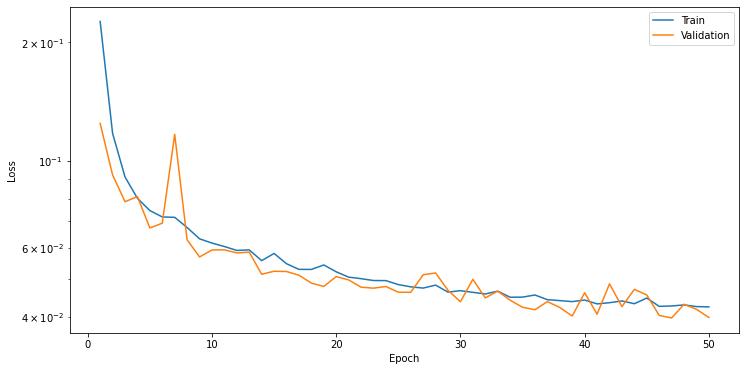

In [15]:
plot_loss(model4_hist)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98    214352
           1       0.98      0.99      0.99    213684

    accuracy                           0.99    428036
   macro avg       0.99      0.99      0.99    428036
weighted avg       0.99      0.99      0.99    428036

True Negative:  209664
False Positive:  4688
False Negative:  1728
True Negative:  211956
True Positive Rate (Recall):  0.9919132925254114
True Negative Rate (Specificity):  0.9781294319623797
False Negative Rate:  0.008086707474588645
False Positive Rate:  0.02187056803762036
Precision:  0.9783608131312199


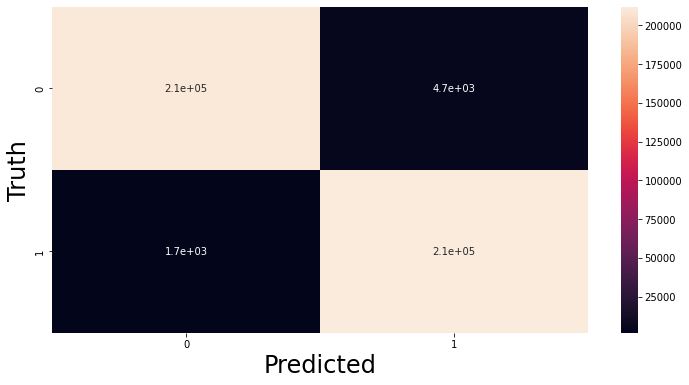

In [16]:
evaluate_model(Model4, x_test, y_test)

In [17]:
Model4.save('saved_models/LSTMModel1.h5')